In [6]:
pip install google-api-python-client 

In [7]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



# Extracting the Data from the Youtube API V3

In [8]:


from googleapiclient.discovery import build
from dotenv import load_dotenv
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#access the data from the dotenv file
load_dotenv()

# setting up the youtube API key to access the channels
API_KEY = os.getenv("API_KEY")
youtube = build('youtube', 'v3', developerKey=API_KEY)
# this creates a connection to youtube API v3


In [9]:
# List of channel id which will be used to get the data from the corresponding channel

channel_ids = [" UCq-Fj5jknLsUf-MWSy4_brA", #Tseris
               "UCupvZG-5ko_eiXAupbDfxWw", #Cnn
               "UCvC4D8onUfXzvjTOM-dBfEA", #Marvel
               "UCMiJRAwDNSNzuYeN2uWa0pA", #Techchannel
               "UCYPvAwZP8pZhSMW8qs7cVCw", #India Today
               "UCb-xXZ7ltTvrh9C6DgB9H-Q", #Prasd Tech in telugu
               "UCBi2mrWuNuyYy4gbM6fU18Q", #ABC NEws
               "UCnQC_G5Xsjhp9fEJKuIcrSw", #Benshapiro
               "UCXuqSBlHAE6Xw-yeJA0Tunw", #LinusTech
               "UCsTcErHg8oDvUnTzoqsYeNw", #Unboxtheropy
               "UCOmcA3f_RrH6b9NmcNa4tdg", #CNET
               "UCOpcACMWblDls9Z6GERVi1A", #Screen Junkies
               "UCVtL1edhT8qqY-j2JIndMzg", #CineFix
               "UCLXo7UDZvByw2ixzpQCufnA", #Vox
               "UCvJJ_dzjViJCoLf5uKUTwoA", #CNBC
               "CoUxsWakJucWg46KW5RsvPw",  #Financial
               "UCX6b17PVsYBQ0ip5gyeme-Q", #CrashCourse
               "UC4a-Gbdw7vOaccHmFo40b9g", #Khan Academy
               "UCsooa4yRKGN_zEE8iknghZA", #Ted-ed
               "UCq2E1mIwUKMWzCA4liA_XGQ", #PickUpLimes
               "UCJ24N4O0bP7LGLBDvye7oCA", #Matt
               "UCSPYNpQ2fHv9HJ-q6MIMaPw", #Financialdiet
               "UCFKE7WVJfvaHW5q283SxchA", #Yoga with Adriene
              ]


In [10]:


def get_channel_stats(youtube, channel_ids):
    """
    This function retrieves channel statistics from the YouTube API.

    Parameters:
    youtube (googleapiclient.discovery.Resource): An authenticated instance of the YouTube API.
    channel_ids (list): A list of YouTube channel IDs for which to retrieve statistics.
    Returns:
    list: A list of dictionaries, where each dictionary contains the following keys:
          - Channel_name: The name of the YouTube channel.
          - Subscribers: The number of subscribers to the channel.
          - Views: The total number of views on the channel.
          - Total_videos: The total number of videos uploaded to the channel.
          - playlist_id: The ID of the channel's upload playlist.
    """
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data


In [11]:
# Calling the function to get the channel statistics 
channel_statistics = get_channel_stats(youtube, channel_ids)

# Storing the data in a pandas dataframe
channel_data = pd.DataFrame(channel_statistics)

channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,CNN,17800000,17555391884,170305,UUupvZG-5ko_eiXAupbDfxWw
1,Pick Up Limes,4370000,295590699,232,UUq2E1mIwUKMWzCA4liA_XGQ
2,India Today,10100000,4556504362,227583,UUYPvAwZP8pZhSMW8qs7cVCw
3,Marvel Entertainment,21200000,6479495308,9472,UUvC4D8onUfXzvjTOM-dBfEA
4,Unbox Therapy,24800000,4813983508,2339,UUsTcErHg8oDvUnTzoqsYeNw
5,CineFix - IGN Movies and TV,3720000,1030492351,2231,UUVtL1edhT8qqY-j2JIndMzg
6,CNBC,3840000,1800727871,15544,UUvJJ_dzjViJCoLf5uKUTwoA
7,T-Series,289000000,289336105275,22931,UUq-Fj5jknLsUf-MWSy4_brA
8,The Financial Diet,1230000,156931455,1346,UUSPYNpQ2fHv9HJ-q6MIMaPw
9,CrashCourse,16300000,2091291175,1612,UUX6b17PVsYBQ0ip5gyeme-Q


In [12]:
video_ids = []

# Getting the video ids from the channel's upload playlist
for channel_id in channel_data['playlist_id']:
    request = youtube.playlistItems().list(
                        part='snippet',
                        playlistId = channel_id,
                        maxResults = 50
                        )
    response = request.execute()
            
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['snippet']['resourceId']['videoId']) #appending the video ids to the list

In [83]:
def get_video_details(youtube, video_ids):
    """
    Retrieves detailed statistics for a list of YouTube video IDs.

    Parameters:
    youtube (googleapiclient.discovery.Resource): An authenticated instance of the YouTube API.
    video_ids (list): A list of YouTube video IDs for which to retrieve statistics.

    Returns:
    list: A list of dictionaries, where each dictionary contains the following keys:
          - Title: The title of the video.
          - Published_date: The date and time when the video was published.
          - Views: The number of views on the video.
          - Likes: The number of likes on the video.
          - Categories: The category ID of the video.
          - Comments: The number of comments on the video.
    """
    all_video_stats = []

    for i in range(0, len(video_ids), 50):  # YouTube API allows max 50 videos per request
        request = youtube.videos().list(
            part="snippet,statistics",
            id=",".join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response.get("items", []):  # Prevent KeyError if 'items' is missing
            video_stats = dict(
                Title=video["snippet"]["title"],
                Published_date=video["snippet"]["publishedAt"],
                Views=video["statistics"].get("viewCount", 0),  # .get() to handle missing data
                Likes=video["statistics"].get("likeCount", 0),
                Categories = video["snippet"]["categoryId"],
                Comments=video["statistics"].get("commentCount", 0)  # Removed 'dislikeCount'
            )
            all_video_stats.append(video_stats)

    return all_video_stats


In [155]:
# Getting the each video details
video_details = get_video_details(youtube, video_ids)
# storing the details into a dataframe
video_data = pd.DataFrame(video_details)

video_data.head(10)

,Title,Published_date,Views,Likes,Categories,Comments
0,Voters confront GOP lawmaker over Trump's move...,2025-03-18T13:22:33Z,7365,1023,25,116
1,Israel breaks ceasefire with Hamas,2025-03-18T13:08:23Z,1362,100,25,47
2,Judge scolds Trump admin. in tense hearing ove...,2025-03-18T13:02:03Z,90784,3081,25,2619
3,See rare footage of snow leopards in Pakistan,2025-03-18T12:39:42Z,3971,538,25,20
4,Ceasefire shatters as Israel pounds Gaza with ...,2025-03-18T12:08:22Z,50010,946,25,1230
5,CNN uncovers atrocities in Syrian town,2025-03-18T11:26:22Z,3869,282,25,33
6,"'Don't try me today, Scotty': Cari Champion & ...",2025-03-18T11:00:07Z,66776,1201,25,1156
7,Ana Navarro: Autopen conspiracies are Trump’s ...,2025-03-18T10:30:29Z,39902,585,25,710
8,Five Years Later: What We Know About Long Covid,2025-03-18T08:16:16Z,2899,59,25,63
9,White House doubles down on ignoring judge’s o...,2025-03-18T02:02:42Z,21046,648,25,140


In [157]:
categories = video_data['Categories']

category_data = []
for i in categories:
    request = youtube.videoCategories().list(
      part = 'snippet',
      id = i
   )

    response = request.execute()
    
    for vid in response.get('items',[]):
       category_data.append(vid['snippet']['title'])
categories_column = pd.DataFrame(category_data)

video_data['Category_id'] = categories
video_data['Categories'] = categories_column

In [158]:
video_data.head()

,Title,Published_date,Views,Likes,Categories,Comments,Category_id
0,Voters confront GOP lawmaker over Trump's move...,2025-03-18T13:22:33Z,7365,1023,News & Politics,116,25
1,Israel breaks ceasefire with Hamas,2025-03-18T13:08:23Z,1362,100,News & Politics,47,25
2,Judge scolds Trump admin. in tense hearing ove...,2025-03-18T13:02:03Z,90784,3081,News & Politics,2619,25
3,See rare footage of snow leopards in Pakistan,2025-03-18T12:39:42Z,3971,538,News & Politics,20,25
4,Ceasefire shatters as Israel pounds Gaza with ...,2025-03-18T12:08:22Z,50010,946,News & Politics,1230,25


In [159]:
# displaying all rows and columns

pd.set_option('display.max_rows', None)


# Uploading the data into a csv file
video_data.to_csv('youtube_data.csv',index=False)

change_date = []

for data in video_data['Published_date']:
    data = datetime.strptime(str(data), "%Y-%m-%dT%H:%M:%SZ").strftime('%Y-%m-%d')
    video_data['Published_date'] = data



# Displaying the first 50 rows of the data
video_data.head()


,Title,Published_date,Views,Likes,Categories,Comments,Category_id
0,Voters confront GOP lawmaker over Trump's move...,2024-11-20,7365,1023,News & Politics,116,25
1,Israel breaks ceasefire with Hamas,2024-11-20,1362,100,News & Politics,47,25
2,Judge scolds Trump admin. in tense hearing ove...,2024-11-20,90784,3081,News & Politics,2619,25
3,See rare footage of snow leopards in Pakistan,2024-11-20,3971,538,News & Politics,20,25
4,Ceasefire shatters as Israel pounds Gaza with ...,2024-11-20,50010,946,News & Politics,1230,25


In [160]:
video_data['Source'] = 'YoutubeAPI'
video_data["Title_id"] = video_data["Title"].factorize()[0] 

video_data.to_csv('youtube_data.csv',index=False)

video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1100 non-null   object
 1   Published_date  1100 non-null   object
 2   Views           1100 non-null   object
 3   Likes           1100 non-null   object
 4   Categories      1100 non-null   object
 5   Comments        1100 non-null   object
 6   Category_id     1100 non-null   object
 7   Source          1100 non-null   object
 8   Title_id        1100 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 77.5+ KB


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Videos')

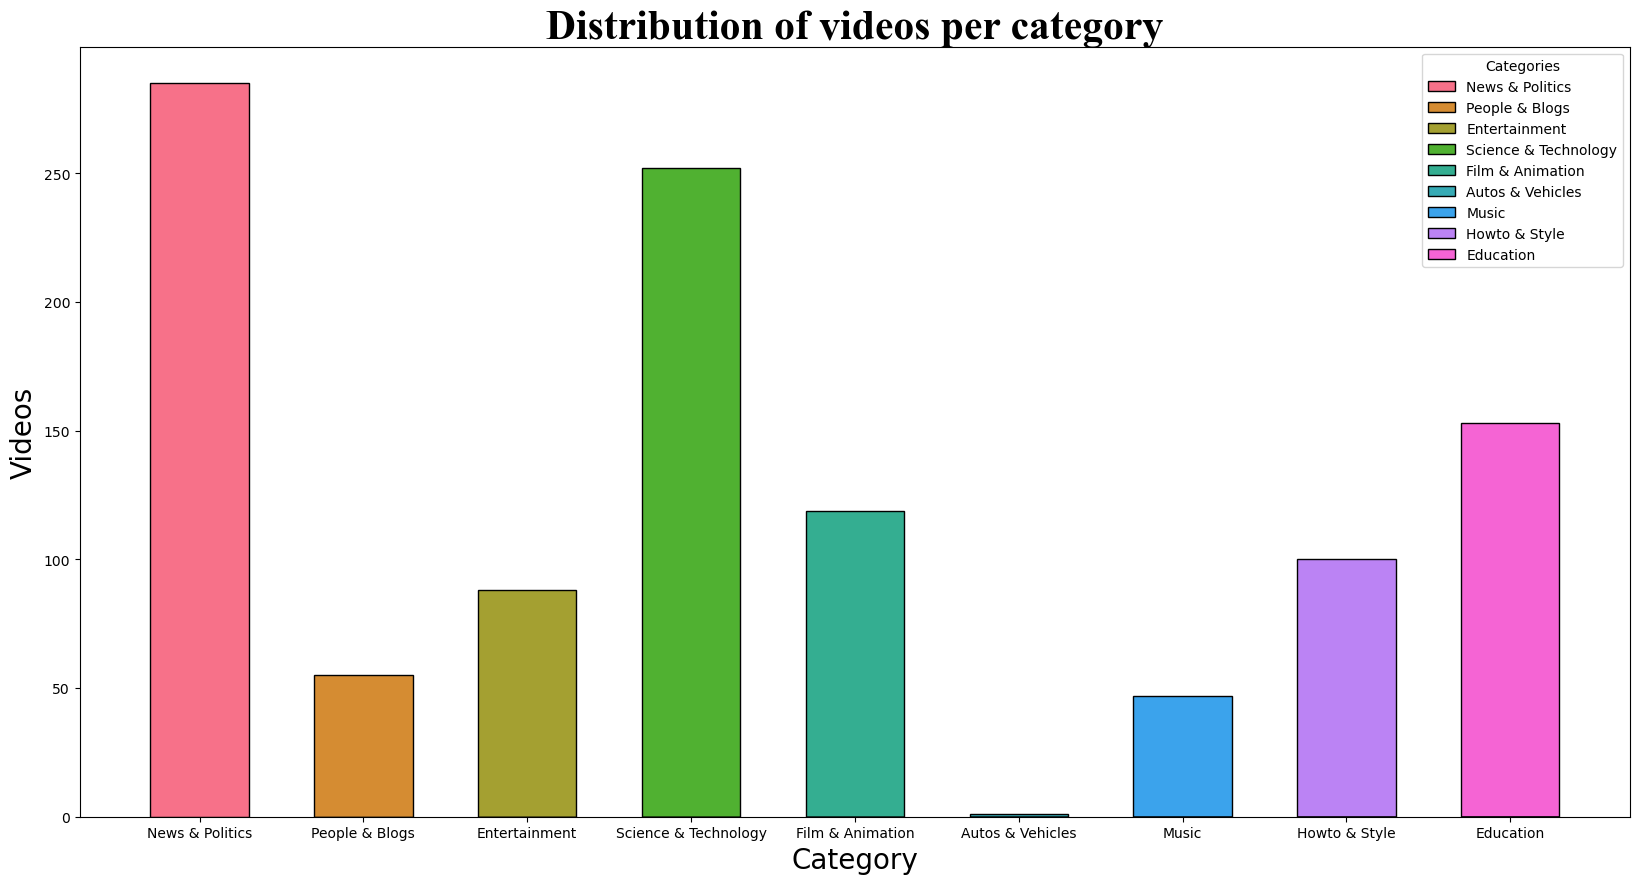

In [20]:
# Plotting number of views per category

plt.figure(figsize=(20,10))
sns.histplot(x ='Categories',data=video_data,palette='husl', hue='Categories',alpha=1,shrink=0.6)
plt.title('Distribution of videos per category', fontsize=30, fontweight='bold',fontname='times new roman')
plt.xlabel('Category', fontsize=20)
plt.ylabel('Videos', fontsize=20)




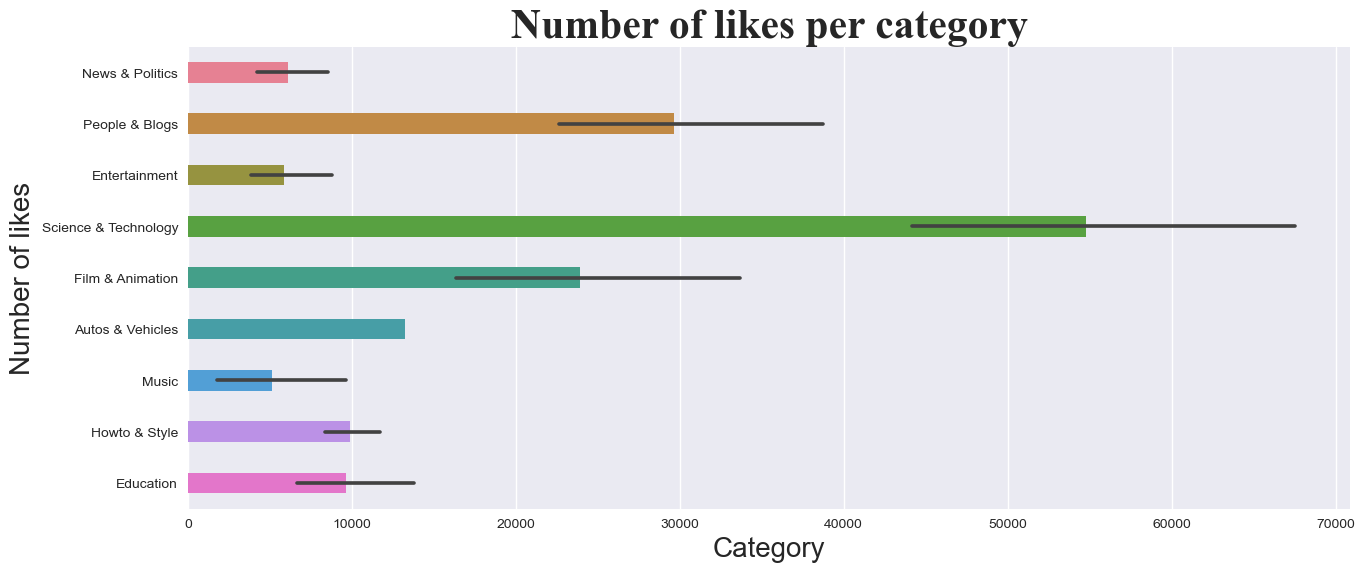

In [21]:
# Plotting number of likes per category
plt.figure(figsize=(15,6))
plt.style.use('seaborn-v0_8')

csv_data = pd.read_csv('youtube_data.csv')

sns.barplot( y='Categories',x='Likes', data=csv_data,palette='husl',hue='Categories',width=0.4)
plt.title('Number of likes per category', fontsize=30, fontweight='bold',fontname='times new roman')
plt.xlabel('Category', fontsize=20)
plt.ylabel('Number of likes', fontsize=20)

plt.show()

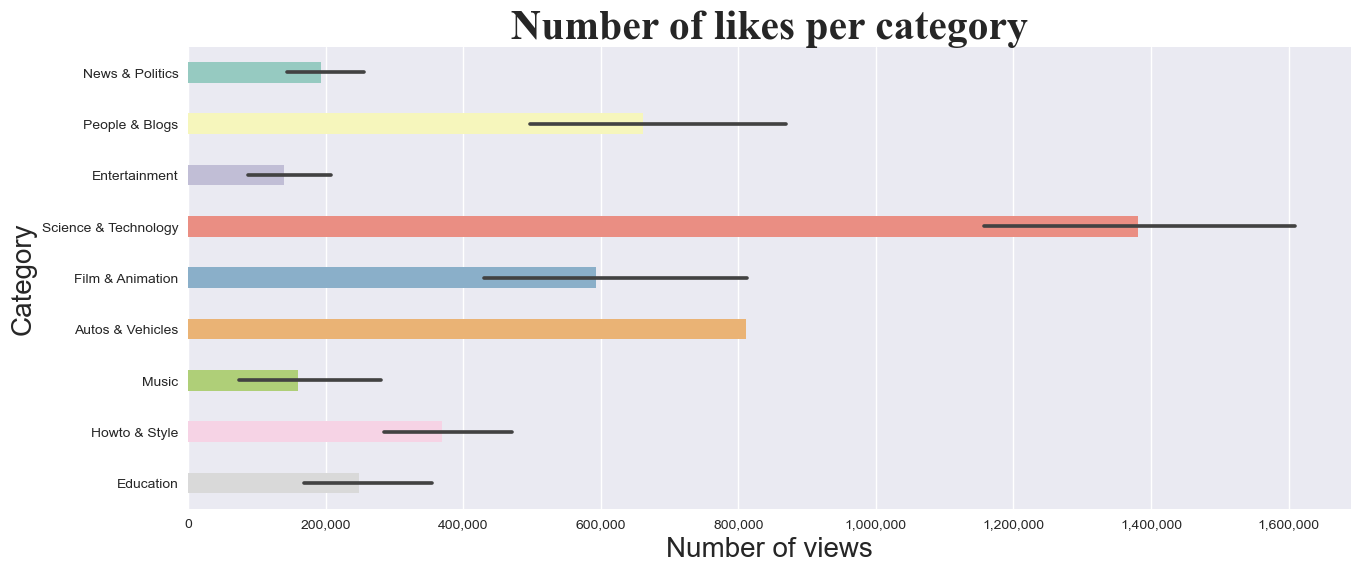

In [22]:
import matplotlib.ticker as ticker

# Plotting number of likes per category
plt.figure(figsize=(15,6))
plt.style.use('seaborn-v0_8')

csv_data = pd.read_csv('youtube_data.csv')
ax = plt.gca()
sns.barplot( y='Categories',x='Views', data=csv_data,palette='Set3',hue='Categories',width=0.4)
plt.title('Number of likes per category', fontsize=30, fontweight='bold',fontname='times new roman')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Number of views', fontsize=20)
plt.ylabel('Category', fontsize=20)
plt.show()

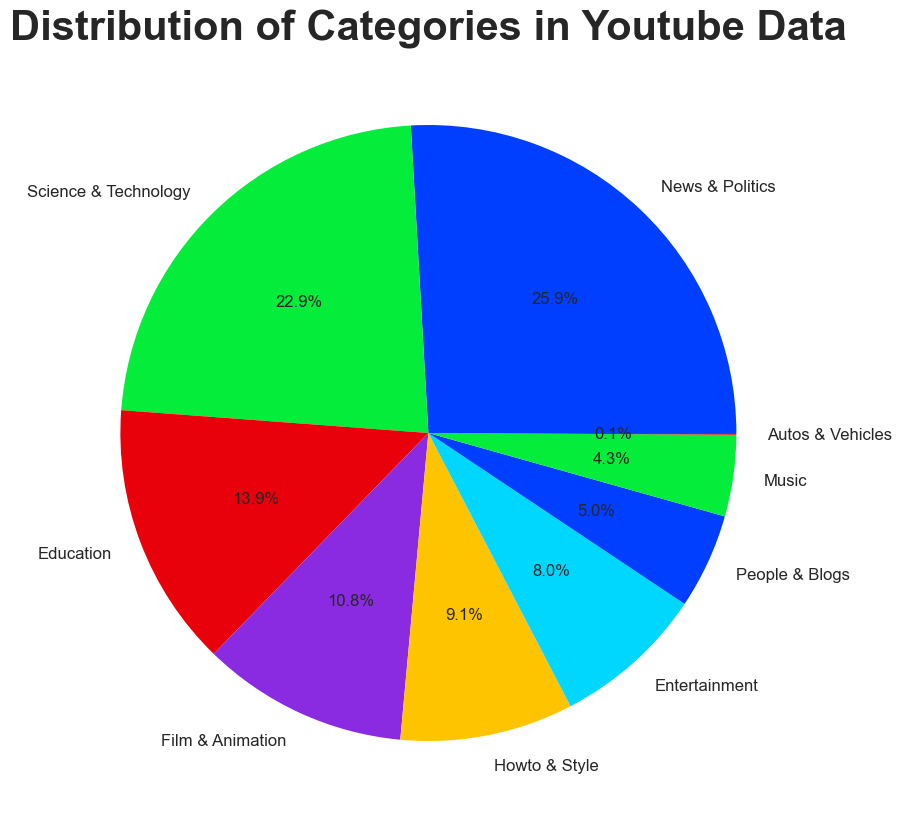

In [23]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,10))
plt.pie(video_data['Categories'].value_counts(),labels=video_data['Categories'].value_counts().index,autopct="%1.1f%%",textprops={'fontsize':12})
plt.title("Distribution of Categories in Youtube Data", fontsize=30, fontweight='bold')
plt.show()

# Extracting the data from the Kaggle Dataset

In [89]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd 

api = KaggleApi()
api.authenticate()

api.dataset_download_files('rmisra/news-category-dataset',path='./',unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset


In [161]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df = pd.read_json('News_Category_Dataset_v3.json',lines=True)
df.head(10)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
6,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22
7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22
8,https://www.huffpost.com/entry/mija-documentar...,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,"In ""Mija,"" director Isabel Castro combined mus...",Marina Fang,2022-09-22
9,https://www.huffpost.com/entry/biden-un-russia...,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS,White House officials say the crux of the pres...,"Aamer Madhani, AP",2022-09-21


In [162]:

kaggle_data = pd.read_json('News_Category_Dataset_v3.json',lines=True)

kaggle_data.to_csv('kaggle_data.csv',index=False)


In [165]:
kaggle_data = pd.read_csv('kaggle_data.csv')

kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209521 non-null  object
 2   category           209527 non-null  object
 3   short_description  189815 non-null  object
 4   authors            172109 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [166]:
kaggle_data.dropna(subset = ['headline','short_description','authors'],inplace= True)

kaggle_data = kaggle_data.drop(columns = ['link','short_description','authors'])


kaggle_data.rename(columns={"headline":"Title","date":"Published_date","category":"Categories"},inplace=True)

In [167]:
kaggle_data['Source'] = 'KaggleAPI'
kaggle_data["Title_id"] = kaggle_data["Title"].factorize()[0] 
kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156859 entries, 0 to 209522
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Title           156859 non-null  object
 1   Categories      156859 non-null  object
 2   Published_date  156859 non-null  object
 3   Source          156859 non-null  object
 4   Title_id        156859 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.2+ MB


In [168]:

pd.set_option('display.max_rows',None)

kaggle_data.to_csv('kaggle_data.csv',index=False)

video_data = pd.read_csv('youtube_data.csv')



In [169]:
video_data.sample(10)

,Title,Published_date,Views,Likes,Categories,Comments,Category_id,Source,Title_id
326,Why President Trump's meme coin is raising ala...,2024-11-20,16140,292,News & Politics,41,25,YoutubeAPI,323
159,We need him back.,2024-11-20,29995,4065,Entertainment,64,24,YoutubeAPI,157
104,"Sunita Williams, Butch Wilmore LIVE News | Ast...",2024-11-20,21516,134,News & Politics,0,25,YoutubeAPI,104
351,Mehsoos (Song)💘 Shushant & Viidhi | Abhay Jodh...,2024-11-20,16260,357,Music,14,10,YoutubeAPI,348
727,"Cables Aren’t Supposed To Melt, Right? - WAN S...",2024-11-20,516293,10301,Science & Technology,1176,28,YoutubeAPI,723
931,Honest Trailers | Deadpool & Wolverine,2024-11-20,1765340,66254,Film & Animation,3737,1,YoutubeAPI,927
736,The ULTIMATE Sleeper Gaming TV,2024-11-20,2010669,127551,Science & Technology,3996,28,YoutubeAPI,732
738,Find the FAKE PC Gamer,2024-11-20,785709,39288,Science & Technology,3194,28,YoutubeAPI,734
948,In Today's World Nothing Is Allowed to Die | T...,2024-11-20,42439,1153,Film & Animation,13,1,YoutubeAPI,944
117,Canada's Carney Meets With European Allies As ...,2024-11-20,280,15,News & Politics,0,25,YoutubeAPI,116


In [170]:
category_mapping = {
    "U.S. NEWS": "News & Politics",
    "WORLD NEWS": "News & Politics",
    "POLITICS": "News & Politics",
    "WEIRD NEWS":"News & Politics",
    "CRIME":"News & Politics",
    "COMEDY": "Entertainment",
    "MEDIA":"Entertainment",
    "ENTERTAINMENT": "Entertainment",
    "ARTS & CULTURE": "Entertainment",
    "HOME & LIVING":"People & Blogs",
    "WOMEN":"People & Blogs",
    "PARENTING": "People & Blogs",
    "EDUCATION": "Education",
    "STYLE & BEAUTY": "Howto & Style",
    "SPORTS": "Health & Sports",
    "HEALTHY LIVING": "Health & Sports",
    "WELLNESS": "Health & Sports",
    "FOOD & DRINK": "People & Blogs",
    "BUSINESS": "Business",
    "MONEY": "Business",
    "SCIENCE": "Science & Technology",
    "TRAVEL":"Travel & Events",
    "ENVIRONMENT": "Travel & Events",
    "TECHNOLOGY": "Science & Technology",
    "TECH": "Science & Technology"
}

# Apply the category mapping
kaggle_data["Categories"] = kaggle_data["Categories"].map(category_mapping).fillna("Others")



# remvoving the data with others category mapping 
kaggle_data = kaggle_data[kaggle_data["Categories"] != "Others"]


category_counts = kaggle_data["Categories"].value_counts()




In [171]:
categories = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Health & Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Business",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers",
    45:"Others"
}

category_to_id = {v: k for k, v in categories.items()}

# Add category_id column
kaggle_data["Category_id"] = kaggle_data["Categories"].map(category_to_id).astype("Int64")

In [172]:
kaggle_data.to_csv('kaggle_data.csv',index=False)
kaggle_data.head(10)

,Title,Categories,Published_date,Source,Title_id,Category_id
0,Over 4 Million Americans Roll Up Sleeves For O...,News & Politics,2022-09-23,KaggleAPI,0,25
1,"American Airlines Flyer Charged, Banned For Li...",News & Politics,2022-09-23,KaggleAPI,1,25
2,23 Of The Funniest Tweets About Cats And Dogs ...,Entertainment,2022-09-23,KaggleAPI,2,24
3,The Funniest Tweets From Parents This Week (Se...,People & Blogs,2022-09-23,KaggleAPI,3,22
4,Woman Who Called Cops On Black Bird-Watcher Lo...,News & Politics,2022-09-22,KaggleAPI,4,25
6,Reporter Gets Adorable Surprise From Her Boyfr...,News & Politics,2022-09-22,KaggleAPI,5,25
7,Puerto Ricans Desperate For Water After Hurric...,News & Politics,2022-09-22,KaggleAPI,6,25
9,Biden At UN To Call Russian War An Affront To ...,News & Politics,2022-09-21,KaggleAPI,8,25
10,World Cup Captains Want To Wear Rainbow Armban...,News & Politics,2022-09-21,KaggleAPI,9,25
11,Man Sets Himself On Fire In Apparent Protest O...,News & Politics,2022-09-21,KaggleAPI,10,25


Text(0, 0.5, 'Videos')

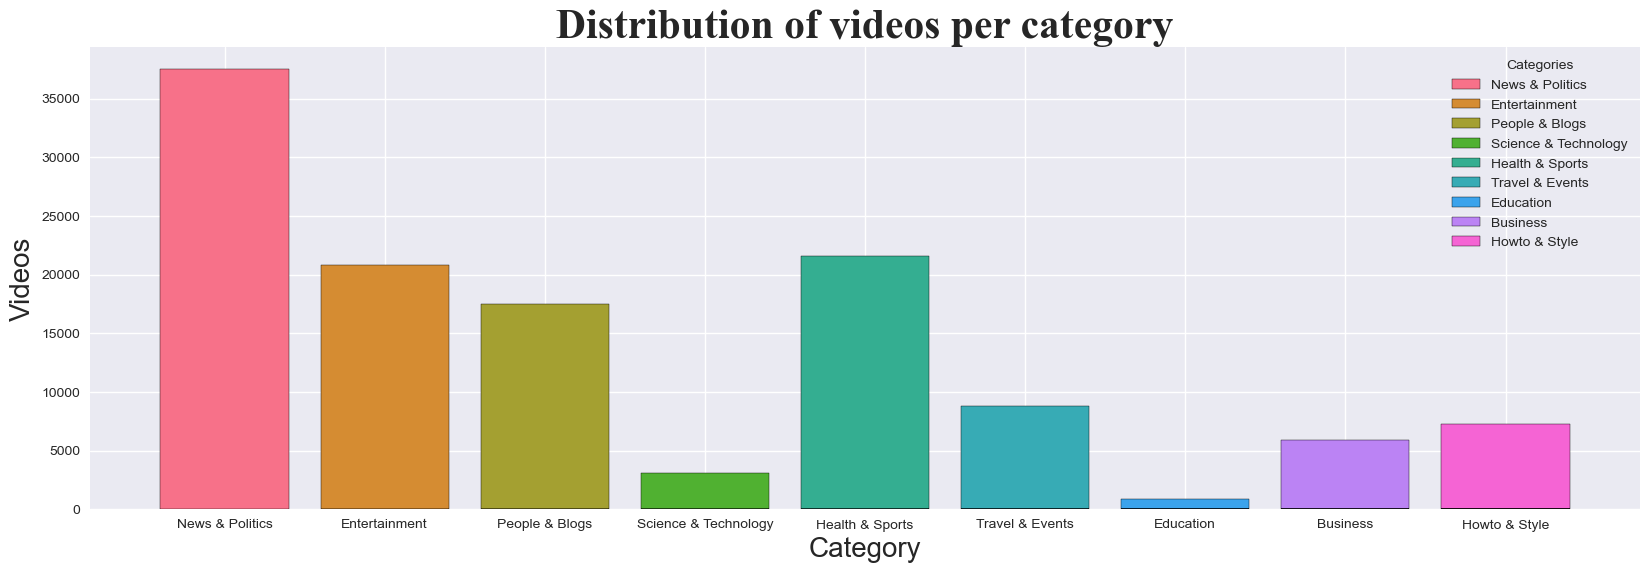

In [34]:
# Plotting number of views per category

plt.figure(figsize=(20,6))
sns.histplot(x ='Categories',data=kaggle_data,palette='husl', hue='Categories',alpha=1,shrink=0.8)
plt.title('Distribution of videos per category', fontsize=30, fontweight='bold',fontname='times new roman')
plt.xlabel('Category', fontsize=20)
plt.ylabel('Videos', fontsize=20)


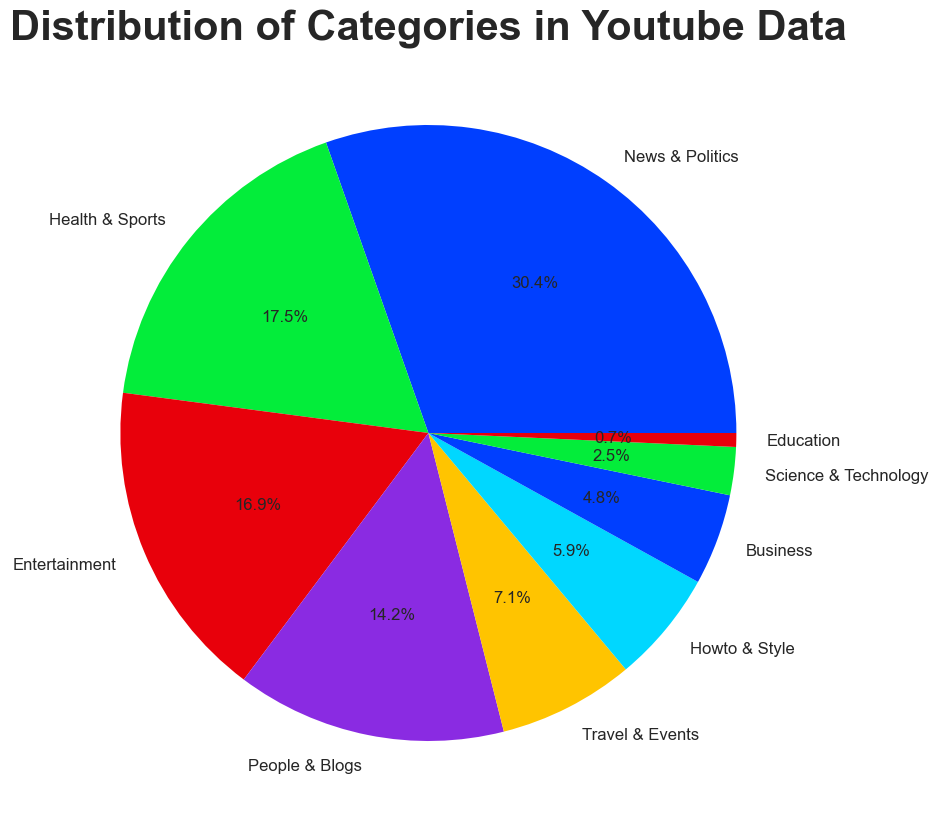

In [35]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,10))
plt.pie(kaggle_data['Categories'].value_counts(),labels=kaggle_data['Categories'].value_counts().index,autopct="%1.1f%%",textprops={'fontsize':12})
plt.title("Distribution of Categories in Youtube Data", fontsize=30, fontweight='bold')
plt.show()

In [179]:
merged_data = pd.concat([video_data, kaggle_data], ignore_index=False)
merged_data["Title_id"] = merged_data["Title"].factorize()[0] 

In [180]:
merged_data.to_csv("merged_data.csv", index=False)

In [181]:
merged_data.sample(10)

,Title,Published_date,Views,Likes,Categories,Comments,Category_id,Source,Title_id
173045,What a Mom Wants for Her Ordinary Kid,2013-02-23,NaN,NaN,People & Blogs,NaN,22,KaggleAPI,101043
143903,"From Father to Son, Mentorship and Entrepreneu...",2013-12-28,NaN,NaN,Business,NaN,31,KaggleAPI,83997
175995,The Dangers of Patriotism in Serbia,2013-01-23,NaN,NaN,Travel & Events,NaN,19,KaggleAPI,102782
186312,Quaker Oats Employees Win Powerball Lottery Fo...,2012-10-04,NaN,NaN,Business,NaN,31,KaggleAPI,109177
93507,Bernie Sanders' Appeal Has Doubled Among Ameri...,2015-07-24,NaN,NaN,News & Politics,NaN,25,KaggleAPI,65524
60435,New 'American Horror Story' Set Photos Reveal ...,2016-08-02,NaN,NaN,Entertainment,NaN,24,KaggleAPI,46304
92264,Heroin Abuse Is Also Fueling This Viral Epidemic,2015-08-07,NaN,NaN,Health & Sports,NaN,17,KaggleAPI,64755
62179,Here's Why People Find Pokemon Go So Irresistible,2016-07-13,NaN,NaN,Health & Sports,NaN,17,KaggleAPI,47409
188737,Visiting Famous Authors' Homes (PHOTOS),2012-09-08,NaN,NaN,Travel & Events,NaN,19,KaggleAPI,110716
16014,The Coverage Of Trump’s Big Dumb Body Is Fat W...,2018-01-18,NaN,NaN,News & Politics,NaN,25,KaggleAPI,14984


In [182]:
merged_data["Views"] = merged_data["Views"].transform(lambda x: x.fillna(x.mean()))
merged_data["Likes"] = merged_data["Likes"].transform(lambda x: x.fillna(x.mean()))
merged_data["Comments"] = merged_data["Comments"].transform(lambda x: x.fillna(x.mean()))


In [183]:
merged_data.isna().sum()

Title             0
Published_date    0
Views             0
Likes             0
Categories        0
Comments          0
Category_id       0
Source            0
Title_id          0
dtype: int64

In [184]:
merged_data.duplicated().sum()

176

In [185]:
merged_data['Views'] = merged_data['Views'].fillna(0).astype(int)

merged_data['Likes'] = merged_data['Likes'].fillna(0).astype(int)

merged_data['Comments'] = merged_data['Comments'].fillna(0).astype(int)

In [186]:
merged_data.drop_duplicates(inplace=True)

In [187]:
merged_data['Categories'].value_counts()

Categories
News & Politics         37783
Health & Sports         21619
Entertainment           20894
People & Blogs          17545
Travel & Events          8801
Howto & Style            7228
Business                 5909
Science & Technology     3361
Education                1046
Film & Animation          119
Music                      47
Autos & Vehicles            1
Name: count, dtype: int64

In [188]:
merged_data = merged_data[merged_data['Categories'] != 'Others']

In [189]:
merged_data.shape

(124353, 9)

In [190]:
merged_data.duplicated().sum()

0

In [191]:
merged_data.to_csv('merged_data.csv',index=False)

<Axes: xlabel='count', ylabel='Categories'>

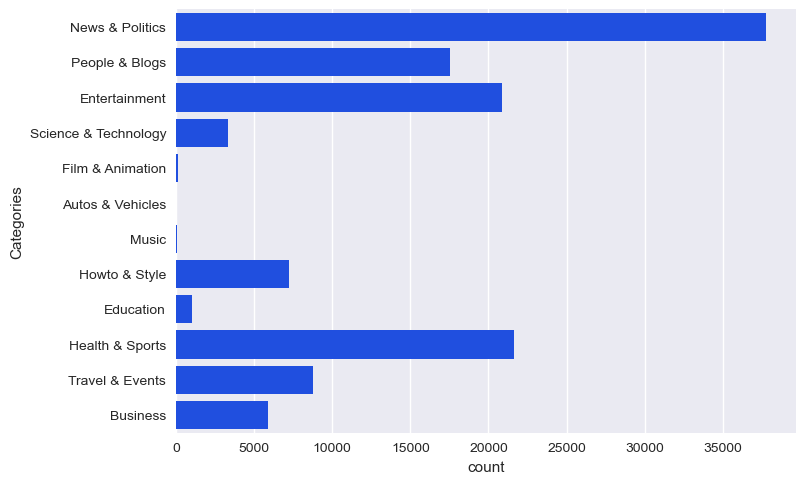

In [192]:
sns.countplot(data= merged_data, y = "Categories")

Text(0.5, 1.0, 'Number of likes per category')

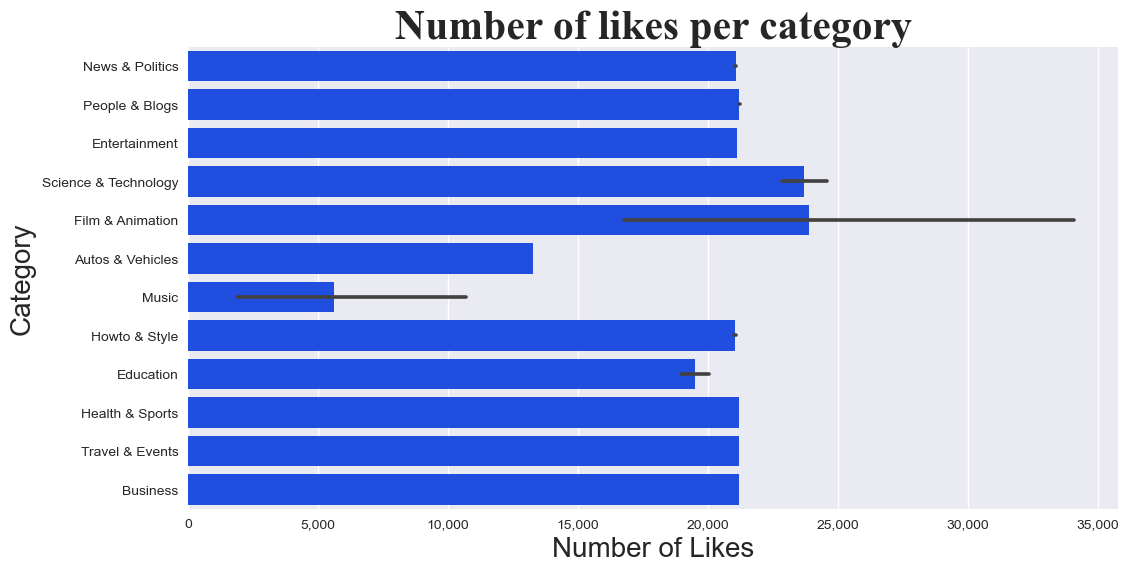

In [193]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=merged_data, y= 'Categories',x = 'Likes')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Number of Likes', fontsize=20)

plt.ylabel('Category', fontsize=20) 

plt.title('Number of likes per category', fontsize=30, fontweight='bold', fontname='times new roman')

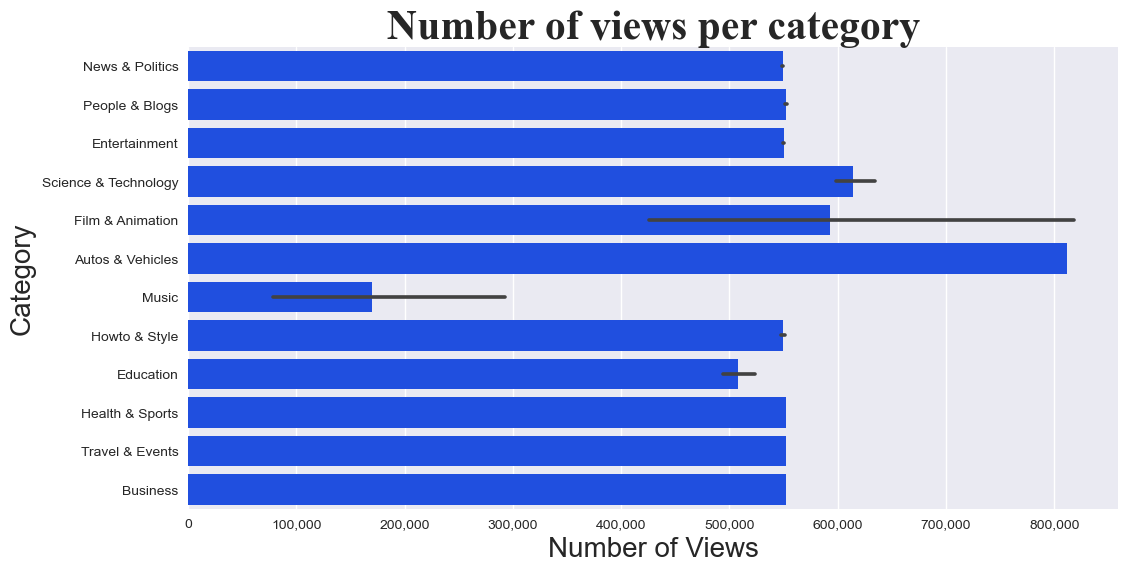

In [194]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=merged_data, y= 'Categories',x = 'Views')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Number of Views', fontsize=20)

plt.ylabel('Category', fontsize=20)

plt.title('Number of views per category', fontsize=30, fontweight='bold', fontname='times new roman')

plt.show()

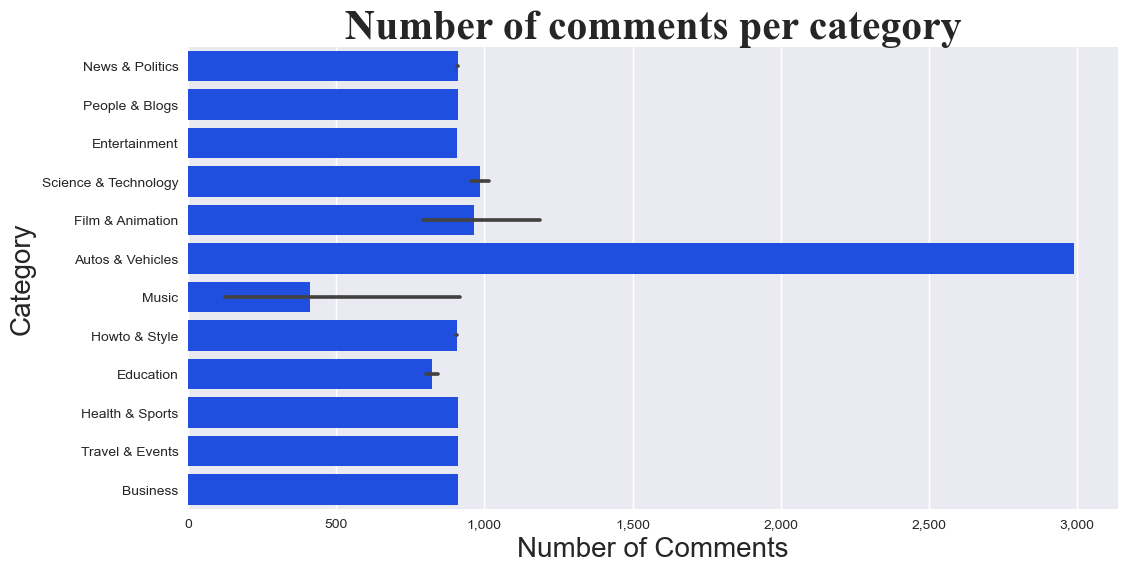

In [195]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=merged_data, y= 'Categories',x = 'Comments')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Number of Comments', fontsize=20)

plt.ylabel('Category', fontsize=20)

plt.title('Number of comments per category', fontsize=30, fontweight='bold', fontname='times new roman')

plt.show()

In [196]:
merged_data['Engagement_rate'] = (merged_data['Likes'] + merged_data['Comments']) / merged_data['Views']

In [197]:
merged_data['Date'] = pd.to_datetime(merged_data['Published_date'],errors= 'coerce')
merged_data['Week'] = merged_data['Date'].dt.day_name()

In [198]:
merged_data.head(10)

,Title,Published_date,Views,Likes,Categories,Comments,Category_id,Source,Title_id,Engagement_rate,Date,Week
0,Voters confront GOP lawmaker over Trump's move...,2024-11-20,7365,1023,News & Politics,116,25,YoutubeAPI,0,0.154650,2024-11-20,Wednesday
1,Israel breaks ceasefire with Hamas,2024-11-20,1362,100,News & Politics,47,25,YoutubeAPI,1,0.107930,2024-11-20,Wednesday
2,Judge scolds Trump admin. in tense hearing ove...,2024-11-20,90784,3081,News & Politics,2619,25,YoutubeAPI,2,0.062786,2024-11-20,Wednesday
3,See rare footage of snow leopards in Pakistan,2024-11-20,3971,538,News & Politics,20,25,YoutubeAPI,3,0.140519,2024-11-20,Wednesday
4,Ceasefire shatters as Israel pounds Gaza with ...,2024-11-20,50010,946,News & Politics,1230,25,YoutubeAPI,4,0.043511,2024-11-20,Wednesday
5,CNN uncovers atrocities in Syrian town,2024-11-20,3869,282,News & Politics,33,25,YoutubeAPI,5,0.081416,2024-11-20,Wednesday
6,"'Don't try me today, Scotty': Cari Champion & ...",2024-11-20,66776,1201,News & Politics,1156,25,YoutubeAPI,6,0.035297,2024-11-20,Wednesday
7,Ana Navarro: Autopen conspiracies are Trump’s ...,2024-11-20,39902,585,News & Politics,710,25,YoutubeAPI,7,0.032455,2024-11-20,Wednesday
8,Five Years Later: What We Know About Long Covid,2024-11-20,2899,59,News & Politics,63,25,YoutubeAPI,8,0.042083,2024-11-20,Wednesday
9,White House doubles down on ignoring judge’s o...,2024-11-20,21046,648,News & Politics,140,25,YoutubeAPI,9,0.037442,2024-11-20,Wednesday


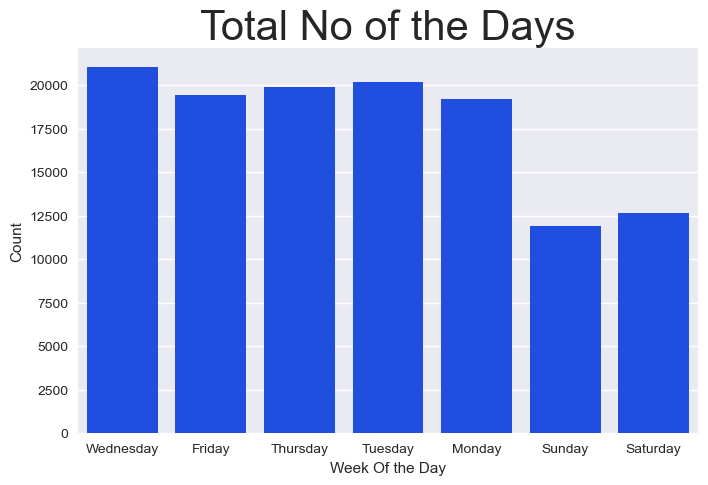

In [199]:
plt.figure(figsize = (8,5))
sns.countplot(data = merged_data, x = "Week")

plt.xlabel("Week Of the Day")
plt.ylabel("Count")
plt.title("Total No of the Days",fontsize= 30)
plt.show()

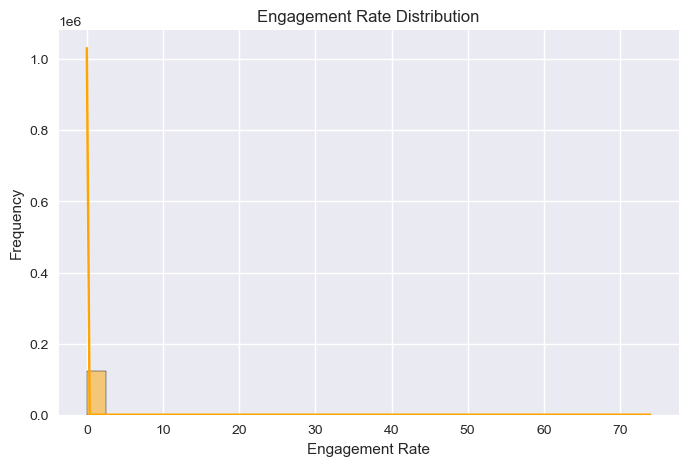

In [200]:
plt.figure(figsize=(8,5))
sns.histplot(merged_data['Engagement_rate'], bins=30, kde=True, color="orange")
plt.title("Engagement Rate Distribution")
plt.xlabel("Engagement Rate")
plt.ylabel("Frequency")
plt.show()

In [201]:
print(merged_data['Engagement_rate'].isna().sum())  # Count NaN values
print(merged_data['Engagement_rate'].isnull().sum())  # Alternative NaN check
print((merged_data['Engagement_rate'] == float('inf')).sum())  # Check for infinity
print((merged_data['Engagement_rate'] == float('-inf')).sum())  #

0
0
0
0


In [202]:
import numpy as np

# Replace inf and -inf with NaN
merged_data['Engagement_rate'] = merged_data['Engagement_rate'].replace([np.inf, -np.inf], np.nan)


In [203]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(merged_data['Engagement_rate'].dropna())

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] < 0.05:
    print("The data is stationary (No need for differencing).")
else:
    print("The data is non-stationary (Differencing needed).")

ADF Statistic: -352.0476891858594
p-value: 0.0
The data is stationary (No need for differencing).


c:\Users\jaspe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaspe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaspe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaspe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jaspe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

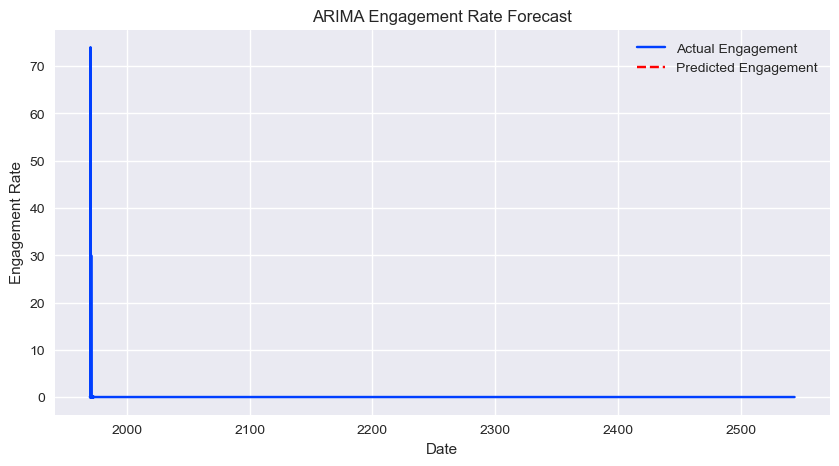

In [204]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p=1, d=1, q=1 as a starting point)
model = ARIMA(merged_data['Engagement_rate'], order=(1,1,1))  # Adjust order as needed
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(merged_data.index, merged_data['Engagement_rate'], label="Actual Engagement")
plt.plot(pd.date_range(merged_data.index[-1], periods=30, freq='D'), forecast, label="Predicted Engagement", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Engagement Rate")
plt.legend()
plt.title("ARIMA Engagement Rate Forecast")
plt.show()


In [ ]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.Collecting prophet
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 932.9 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/13.3 MB 1.0 MB/s eta 0:00:12
   --- ------------------------------------ 1.0/13.3 MB 1.0 MB/s eta 0:00:12
   --- ------------------------------------ 1.0/13.3 MB 1.0 MB/s eta 0:00:12
   --- ------------------------------------ 1.3/13.3 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.6/13.3 MB 1.0 MB/s eta 0:00:12
   ----- ---------------------------------- 1.8/13.3 MB 987.4 kB/s eta 0:00:12
   ----- ---------------------------------- 1.8/13.3 MB 987.4 kB/s eta 0:00:12
   ------ --------------------------------- 2.1/13.3 MB 978.7 kB/s eta 0:00:12
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


21:53:37 - cmdstanpy - INFO - Chain [1] start processing
21:53:43 - cmdstanpy - INFO - Chain [1] done processing


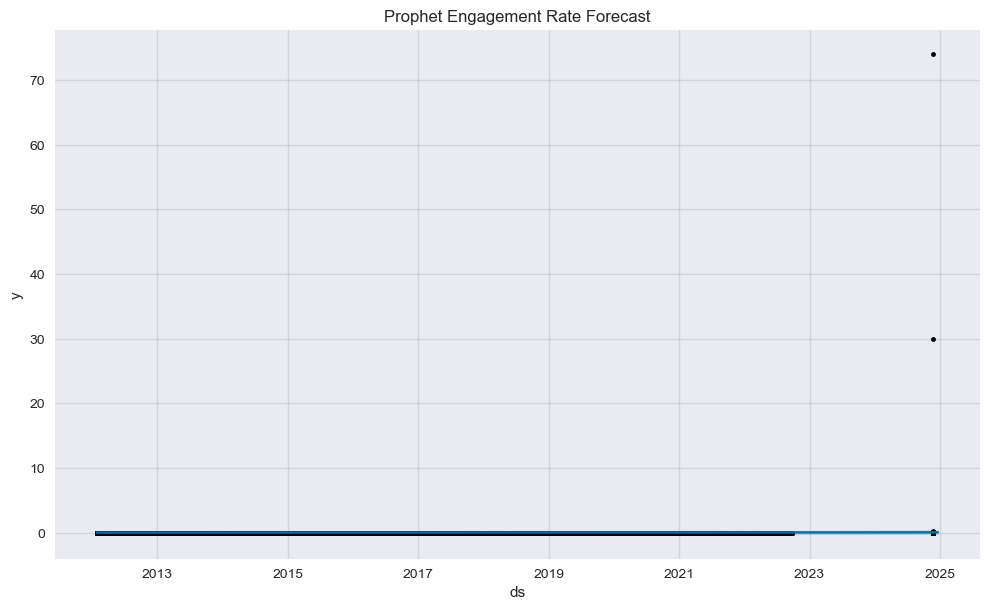

In [205]:
from prophet import Prophet

# Reset index for Prophet
df_prophet = merged_data.reset_index()
df_prophet.rename(columns={"Date": "ds", "Engagement_rate": "y"}, inplace=True)

# Initialize and Fit Prophet Model
model = Prophet()
model.fit(df_prophet)

# Create Future Dates (30 days ahead)
future = model.make_future_dataframe(periods=30)

# Predict Future Engagement Rate
forecast = model.predict(future)

# Plot Results
model.plot(forecast)
plt.title("Prophet Engagement Rate Forecast")
plt.show()


In [229]:
# Create dim_content table (Unique headlines & categories)
dim_cat = merged_data[['Category_id', 'Categories']].drop_duplicates().reset_index(drop=True)

dim_cat.to_csv("Category_table.csv")
print(dim_cat.head())


   Category_id            Categories
0           25       News & Politics
1           22        People & Blogs
2           24         Entertainment
3           28  Science & Technology
4            1      Film & Animation


In [230]:



merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')



# Create dim_date table (Unique dates)
dim_date = merged_data[['Date', 'Week']].drop_duplicates().reset_index(drop=True)
dim_date['Date_id'] = dim_date.index + 1  # Assign unique ID

# Extract day, month, and year
dim_date["Day"] = dim_date["Date"].dt.day
dim_date["Month"] = dim_date["Date"].dt.month
dim_date["Year"] = dim_date["Date"].dt.year

dim_date = dim_date[["Date_id","Date","Year","Month","Day","Week"]]
dim_date.to_csv('Date_table.csv')

print(dim_date.sample(10))


      Date_id       Date  Year  Month  Day       Week
2574     2575 2015-09-04  2015      9    4     Friday
2405     2406 2016-02-20  2016      2   20   Saturday
3683     3684 2012-08-20  2012      8   20     Monday
2102     2103 2016-12-19  2016     12   19     Monday
2147     2148 2016-11-04  2016     11    4     Friday
3668     3669 2012-09-04  2012      9    4    Tuesday
353       354 2021-10-06  2021     10    6  Wednesday
2981     2982 2014-07-23  2014      7   23  Wednesday
2507     2508 2015-11-10  2015     11   10    Tuesday
1808     1809 2017-10-11  2017     10   11  Wednesday


In [231]:
# Merge with dim_content to get headline_id
dim_engagement = merged_data[['Views','Comments','Likes','Engagement_rate']].copy()
dim_engagement.loc[:, 'Engagement_id'] = range(1, len(dim_engagement) + 1)

dim_engagement = dim_engagement[['Engagement_id','Views','Likes','Comments','Engagement_rate']]
dim_engagement.to_csv('Engagement_table.csv')
print(dim_engagement.head())


   Engagement_id  Views  Likes  Comments  Engagement_rate
0              1   7365   1023       116         0.154650
1              2   1362    100        47         0.107930
2              3  90784   3081      2619         0.062786
3              4   3971    538        20         0.140519
4              5  50010    946      1230         0.043511


In [260]:

merged_data["Day"] = merged_data["Date"].dt.day
merged_data["Month"] = merged_data["Date"].dt.month
merged_data["Year"] = merged_data["Date"].dt.year

In [261]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124353 entries, 0 to 209522
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Title            124353 non-null  object        
 1   Published_date   124353 non-null  object        
 2   Views            124353 non-null  int32         
 3   Likes            124353 non-null  int32         
 4   Categories       124353 non-null  object        
 5   Comments         124353 non-null  int32         
 6   Category_id      124353 non-null  Int64         
 7   Source           124353 non-null  object        
 8   Title_id         124353 non-null  int64         
 9   Engagement_rate  124353 non-null  float64       
 10  Date             124353 non-null  datetime64[ns]
 11  Week             124353 non-null  object        
 12  Day              124353 non-null  int32         
 13  Month            124353 non-null  int32         
 14  Year             124353 n

In [237]:
import mysql.connector
# Establishing the connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Jasper@1007"
)

# Creating a cursor object
cursor = conn.cursor()

# Creating a new database
cursor.execute("CREATE DATABASE IF NOT EXISTS youtube;")

print("Database Connected successfully!")

# Selecting the database
cursor.execute("USE youtube;")

Database Connected successfully!


In [238]:
# Create category table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS category(
        Category_id INT PRIMARY KEY AUTO_INCREMENT,
        Categories VARCHAR(100)
    );
""")

print("Category table created successfully")

Category table created successfully


In [239]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS engagement(
        Engagement_id INT PRIMARY KEY AUTO_INCREMENT,
        Views BIGINT,
        Likes BIGINT,
        Comments INT,
        Engagement_rate FLOAT
    );
""")

print("Engagement table created successfully")

Engagement table created successfully


In [240]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS date (
        Date_id INT PRIMARY KEY AUTO_INCREMENT,
        Date DATETIME,
        Day INT,
        Month INT,
        Year INT,
        Week VARCHAR(20)
    );
""")




print("Date table created successfully!")

Date table created successfully!


In [258]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS fact_data (
        Title_id INT PRIMARY KEY AUTO_INCREMENT,
        Source VARCHAR(50),
        Title TEXT,
        Date_id INT,
        Category_id INT,
        Engagement_id INT,
        FOREIGN KEY (Date_id) REFERENCES date(Date_id),
        FOREIGN KEY (Category_id) REFERENCES category(Category_id),
        FOREIGN KEY (Engagement_id) REFERENCES engagement(Engagement_id)
    );
""")

print("Created fact table successfully")

Created fact table successfully


In [ ]:
for _, row in merged_data.iterrows():
    # Insert into date (if not exists)
    cursor.execute("""
        INSERT INTO date (Date, Day, Month, Year, Week)
        VALUES (%s, %s, %s, %s, %s)
        ON DUPLICATE KEY UPDATE Date_id = LAST_INSERT_ID(Date_id);
    """, (row["Date"], row["Day"], row["Month"], row["Year"], row["Week"]))
    date_id = cursor.lastrowid  # Get Date_id

    # Insert into category (if not exists)
    cursor.execute("""
        INSERT INTO category (Categories)
        VALUES (%s)
        ON DUPLICATE KEY UPDATE Category_id = LAST_INSERT_ID(Category_id);
    """, (row["Categories"],))
    category_id = cursor.lastrowid  # Get Category_id

    # Insert into engagement
    cursor.execute("""
        INSERT INTO engagement (Views, Likes, Comments, Engagement_rate)
        VALUES (%s, %s, %s, %s)
    """, (row["Views"], row["Likes"], row["Comments"], row["Engagement_rate"]))
    engagement_id = cursor.lastrowid  # Get Engagement_id

    # Insert into fact_data
    cursor.execute("""
        INSERT INTO fact_data (Title, Source, Date_id, Category_id, Engagement_id)
        VALUES (%s, %s, %s, %s, %s)
    """, (row["Title"], row["Source"], date_id, category_id, engagement_id))

conn.commit()
print("Data inserted successfully!")


Data inserted successfully!
